In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from wordcloud import WordCloud

# import warnings
# warnings.simplefilter(action="ignore")

In [ ]:
sales = pd.read_csv('Dataset.csv')

#importing and loading the dataset into the jupyter notebook
#A csv file is esentially just a file where the values are sperated by commas

In [ ]:
#sales
sales.head()

#Explain the different column over here
#Not all the datatypes are same, we need to check the type of data in each column
#TODO- Add this- Dropping the Invoice Id column

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,NaN,Ewallet,522.83,4.761905,26.1415,9.1
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,NaN,Cash,76.40,4.761905,3.8200,9.6
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Introducing NULL values in the dataset

Will be removed

for c in sales.columns:
    if(c == "Payment"):#Choose a value and replace here
        for i in range(0,5):
            temp = np.random.randint(0,1000)
            sales.Payment.iloc[temp] = None
    if(c == "Time"):#Preset a general time here
        temp = [0,1,99]
        for i in range(0,3):
            tem = temp[i]
            sales.Time.iloc[tem] = None
    if(c == "City"):#Random value here
        for i in range(0,7):
            temp = np.random.randint(0,1000)
            sales.City.iloc[temp] = None
    if(c == "Rating"): #Replace with average value here
        for i in range(0,5):
            temp = np.random.randint(0,1000)
            sales.Rating.iloc[temp] = None
    if(c=="Total"):#drop here
        for i in range(0,9):
            temp = np.random.randint(0,1000)
            sales.Total.iloc[temp] = None
        

In [ ]:
sales.columns

# Explain each Column from here

Index(['Unnamed: 0', 'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:

sales.info()
#different types
# 1. Object
# 2. Float64
# 3. Int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1000 non-null   int64  
 1   Invoice ID               1000 non-null   object 
 2   Branch                   1000 non-null   object 
 3   City                     993 non-null    object 
 4   Customer type            1000 non-null   object 
 5   Gender                   1000 non-null   object 
 6   Product line             1000 non-null   object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   1000 non-null   float64
 10  Total                    991 non-null    float64
 11  Date                     1000 non-null   object 
 12  Time                     997 non-null    object 
 13  Payment                  995 non-null    object 
 14  cogs                     

## Null value analysis


Now we need to check if the data has any inconsistency, basically in terms of null values. So that we don't get faulty analysis and wrong inferences due to missing values

In [ ]:
sales.isnull().sum()

Unnamed: 0                 0
Invoice ID                 0
Branch                     0
City                       7
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      9
Date                       0
Time                       3
Payment                    5
cogs                       0
gross margin percentage    0
gross income               0
Rating                     5
dtype: int64

In [ ]:
sales["Payment"].value_counts()

Ewallet        344
Cash           341
Credit card    310
Name: Payment, dtype: int64

In [ ]:
sales.shape

(1000, 18)

In [ ]:
payment_types = sales["Payment"].unique()

In [ ]:
#Multiple solutions to treating null values
#1. Delete the row
#2. Replace with average value
#3. Replace with nearest row(Forward and backward fill)
#4. Fill with zeroes
#5. Use groupby to fill in Null values, makes everything store specefic
#TODO- Include functions for all values over here


In [ ]:
sales['Time'].mode()
#Issue- 2 modes present, basically we need to choose one and use it

0    14:42
1    19:48
Name: Time, dtype: object

In [ ]:
sales.dropna(how='any',axis=0, subset = "Total",inplace=True) #Dropping the row
sales['Rating'].fillna((sales['Rating'].mean()), inplace=True) #Filling with average value
sales['Time'].fillna((sales['Time'].mode()[0]), inplace=True)
sales['Payment'].fillna((np.random.choice(payment_types)), inplace=True)#Filling with Most Common value
sales.ffill(axis = 0, inplace=True) 

#Explain this groupby
#sales['Total'].fillna(sales.groupby('Branch')['Total'].transform('mean'), inplace = True)

# Datetime

In [ ]:
#Observe the date object- it is basically being taken as string

#Python has a datetime functionality.
sales['date'] = pd.to_datetime(sales['Date'])

In [ ]:
# instead of using .info() which will get the Dtype for the whole dataframe, this time need datatype for "date"
sales['date'].dtype

dtype('<M8[ns]')

In [ ]:
#To do any sort of analysis on the given data, just working with dates won't be enough, we would need information
#in chunks- day, month and year would provide valuable information.
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [ ]:
print(sales['day'].dtype)
sales['month'].dtype

int64


dtype('int64')

# Index and Columns

In [ ]:
print(sales.index.name)

None


In [ ]:
sales.set_index('Date',inplace =True)
#index is basically a method for us to identify rows, now over here the best metric to track each purchase
#will be date to analyse data as a time series

In [ ]:
sales.drop(["Unnamed: 0", "Invoice ID"], axis=1, inplace=True)

In [ ]:
sales

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year
Date,,,,,,,,,,,,,,,,,,,
1/5/2019,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,14:42,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019
3/8/2019,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,14:42,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019
3/3/2019,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019
1/27/2019,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019
2/8/2019,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/29/2019,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2019-01-29,29,1,2019
3/2/2019,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2019-03-02,2,3,2019
2/9/2019,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,13:22,Cash,31.84,4.761905,1.5920,7.7,2019-02-09,9,2,2019


In [ ]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]
categorical_columns

#for cname in df.columns
    #if(df[came].dtype == "object")
        #list.append(cname)

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Time',
 'Payment']

# Description and loc iloc

In [ ]:
print("Unique values in Branch: {0}".format(len(sales['Branch'].unique().tolist())))
print("Unique values in City: {0}".format(len(sales['City'].unique().tolist())))
print("Unique values in Customer Type: {0}".format(len(sales['Customer type'].unique().tolist())))
print("Unique values in Gender: {0}".format(len(sales['Gender'].unique().tolist())))
print("Unique values in Product Line: {0}".format(len(sales['Product line'].unique().tolist())))
print("Unique values in Payment: {0}".format(len(sales['Payment'].unique().tolist())))

Unique values in Branch: 3
Unique values in City: 3
Unique values in Customer Type: 2
Unique values in Gender: 2
Unique values in Product Line: 6
Unique values in Payment: 3


In [ ]:
print("Detailed description/oberview of the dataset")
sales.describe()

Detailed description/oberview of the dataset


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.0
mean,55.760030,5.515641,15.418511,323.788733,308.370222,4.761905,15.418511,6.977812,15.240161,1.990918,2019.0
std,26.495839,2.925594,11.725304,246.231381,234.506077,0.000000,11.725304,1.715315,8.667765,0.835402,0.0
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000,1.000000,1.000000,2019.0
25%,33.050000,3.000000,5.980500,125.590500,119.610000,4.761905,5.980500,5.500000,8.000000,1.000000,2019.0
50%,55.450000,5.000000,12.150000,255.150000,243.000000,4.761905,12.150000,7.000000,15.000000,2.000000,2019.0
75%,78.010000,8.000000,22.539500,473.329500,450.790000,4.761905,22.539500,8.500000,23.000000,3.000000,2019.0
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000,31.000000,3.000000,2019.0


In [ ]:
summ = sales.describe()


#Explain fstring over here

print('Insights obtained from the dataset are as follows :')
print(f"1. Mean ratings of an experience in the supermaket = {summ.iloc[1,-4]}")
print(f"2. Mean cogs obtained from selling the articles    = $ {summ.iloc[1,4]}")
print(f"3. Mean unit price of an article in the supermaket = $ {summ.iloc[1,0]}")
print("4. Mean gross margin percentage of articles sold   = $",summ.iloc[1,5])
# print("5. So mean revenue in dollars of the supermarket   = $",(summ.iloc[1,4]/(summ.iloc[1,5]-1))+summ.iloc[1,4])


Insights obtained from the dataset are as follows :
1. Mean ratings of an experience in the supermaket = 6.977811550151976
2. Mean cogs obtained from selling the articles    = $ 308.37022199798184
3. Mean unit price of an article in the supermaket = $ 55.76003027245207
4. Mean gross margin percentage of articles sold   = $ 4.761904762


In [ ]:
#Include similar stats for storewise data over here.

# Correlation

In [ ]:
Correlation = sales.corr()
#Explain coorelation over here

/var/folders/ct/t_qpgstx5r905g7lqtb5ryvc0000gn/T/ipykernel_39754/3269217584.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation = sales.corr()


In [ ]:
Correlation = sales.corr(numeric_only=True )

In [ ]:
sales["gross margin percentage"].unique()

array([4.76190476])

In [ ]:
np.round(Correlation,2)


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01,0.05,-0.03,NaN
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.01,-0.04,-0.01,NaN
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,0.00,-0.02,NaN
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,0.00,-0.02,NaN
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,0.00,-0.02,NaN
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,0.00,-0.02,NaN
Rating,-0.01,-0.01,-0.04,-0.04,-0.04,NaN,-0.04,1.00,-0.01,-0.05,NaN
day,0.05,-0.04,0.00,0.00,0.00,NaN,0.00,-0.01,1.00,-0.13,NaN
month,-0.03,-0.01,-0.02,-0.02,-0.02,NaN,-0.02,-0.05,-0.13,1.00,NaN


# Heatmap

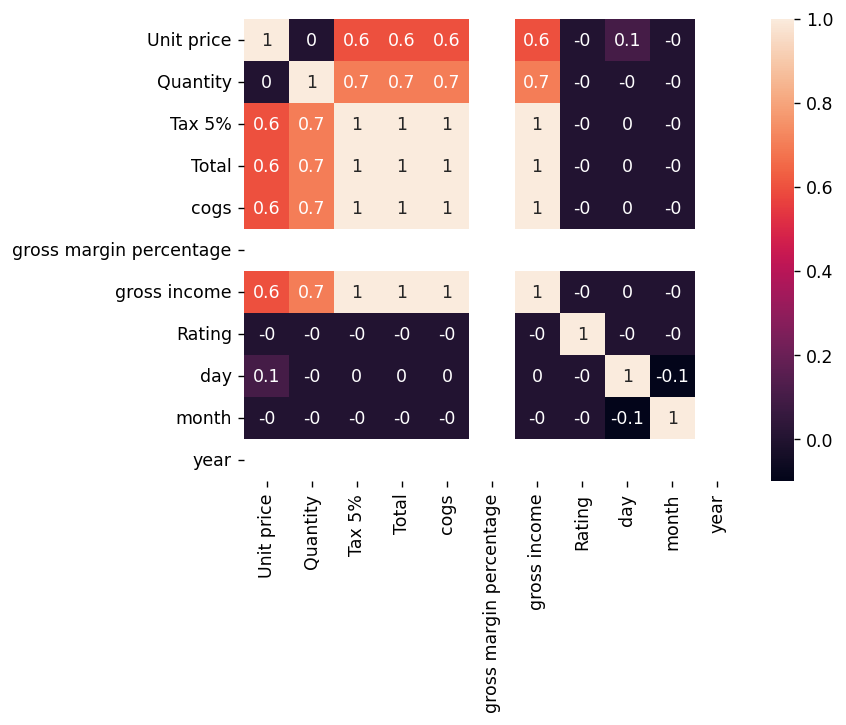

In [ ]:
 
plt.figure(dpi=125)
sns.heatmap(np.round(Correlation,1),annot=True)
plt.show()

#The best correlated are Tax 5%, Total, Gross Income and cogs i.e Cost of Goods sold with a correlation of 1.

#Also, the above mentioned all has a good correlation of 0.71 with Quantity
#Corr is 1 between metrics like Tax and Total because they move hand in hand

From the heatmap, its clear the Tax 5%, Total, Gross Income and cogs (Cost of Goods Sold) are perfectly correlated.

Tax 5%, Total and cogs have a correlation of 0.71% with Quantity, this is pretty sizable.

Now that we idenitfied there correlations, we can plot these parameters and fit a regression line to the data. This can be done using Regplots.

In [ ]:
sales.loc[["3/4/2019"], ["Branch", "Rating"]]

,Branch,Rating
Date,,
3/4/2019,C,7.6
3/4/2019,A,6.7
3/4/2019,A,8.5
3/4/2019,C,8.4
3/4/2019,B,8.0
3/4/2019,A,5.5
3/4/2019,A,4.4
3/4/2019,A,8.8
3/4/2019,A,8.0


In [ ]:
#Develop to this
(sales.loc[["3/3/2019"], :].Branch=="A")

Date
3/3/2019     True
3/3/2019    False
3/3/2019    False
3/3/2019    False
3/3/2019     True
3/3/2019    False
3/3/2019    False
3/3/2019     True
3/3/2019    False
3/3/2019    False
3/3/2019     True
3/3/2019    False
3/3/2019     True
3/3/2019    False
Name: Branch, dtype: bool

# Day-2

## Bar Plots and Count Plots

Female - 497
Male - 494


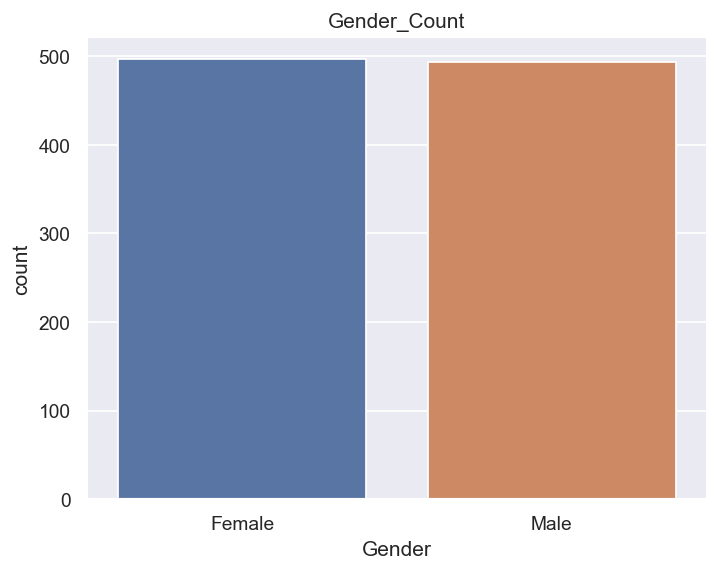

In [ ]:
#Gender Distribution- Starting with a simple plot
plt.figure(dpi = 125)
sns.set(style="darkgrid")       #style the plot background to become a grid
genderCount  = sns.countplot(x="Gender", data =sales).set_title("Gender_Count")
arr = sales.Gender.value_counts()
print(f"Female - {arr[0]}\nMale - {arr[1]}")


## Barplots

# Barplots represent numeric values for a variable with a height. The error associated is represented with error bars.
# The height or length of the bars represents the value of the data. The value corresponds to levels on the y-axis.

# Barplots are usually used to compare different variables, and represent them visually.

#Barplots can be of any metric, count is always total occurences

Lets now use countplots to search for,

Busiest City
Busiest Branch
Most Common Payment Method
For this, we use a countplot,



Yangon - 337
Naypyitaw - 329
Mandalay = 325


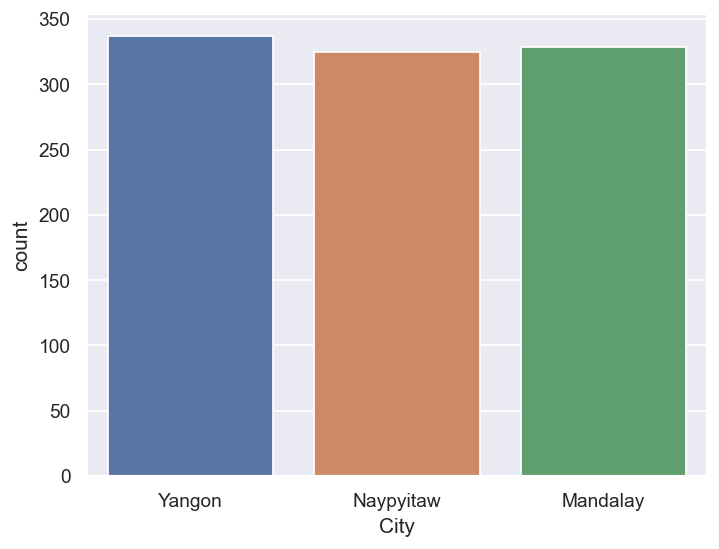

In [ ]:
plt.figure(dpi = 125)
sns.countplot(x="City", data =sales)

arr = sales.City.value_counts()
print(f"Yangon - {arr[0]}\nNaypyitaw - {arr[1]}\nMandalay = {arr[2]}")

Ewallet - 341
Cash - 338
CC = 312


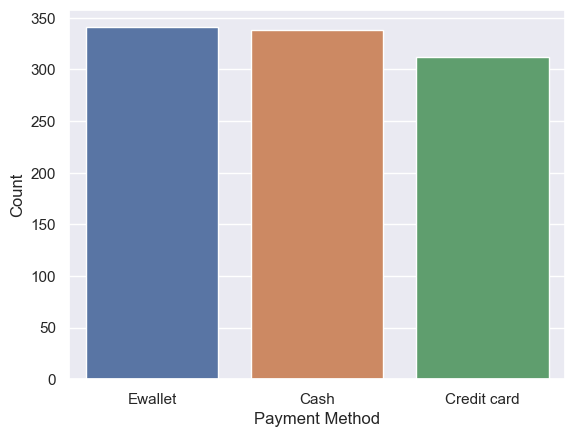

In [ ]:
sns.countplot(x="Payment", data =sales)
plt.xlabel('Payment Method')
plt.ylabel('Count')

ewallet,cash,cc = sales.Payment.value_counts()

print(f"Ewallet - {ewallet}\nCash - {cash}\nCC = {cc}")

### Adding one more dimension to this

<AxesSubplot: xlabel='count', ylabel='City'>

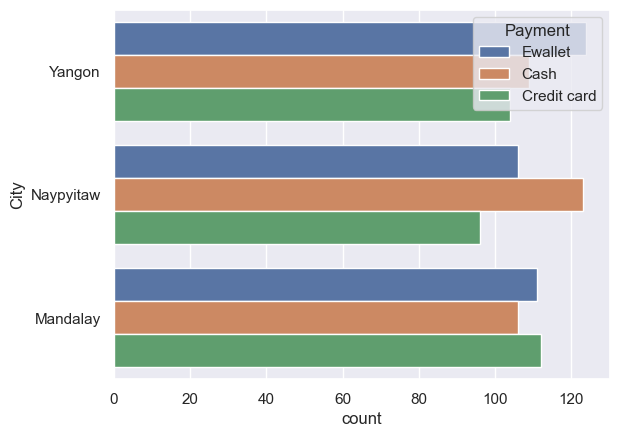

In [ ]:
sns.countplot(y = 'City' , hue = 'Payment' , data = sales)

<AxesSubplot: xlabel='count', ylabel='Product line'>

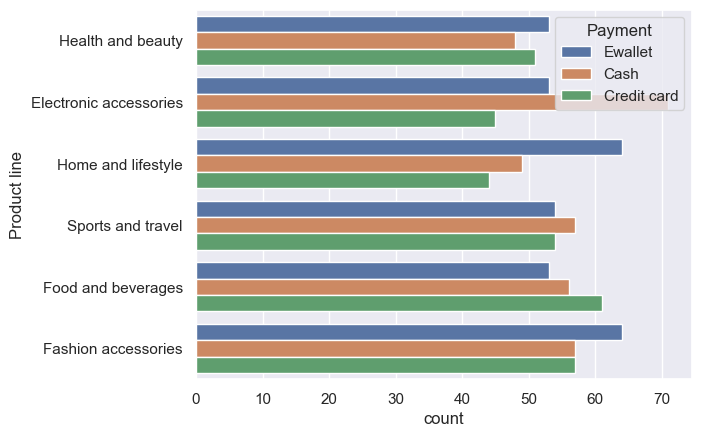

In [ ]:
sns.countplot(y = 'Product line' , hue = 'Payment' , data = sales)

<AxesSubplot: xlabel='count', ylabel='Product line'>

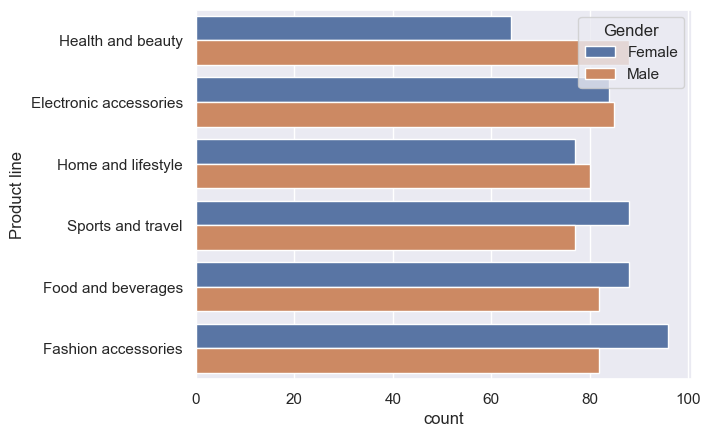

In [ ]:
sns.countplot(y = 'Product line' , hue = 'Gender' , data = sales)

### BarPlots

Barplots represent numeric values for a variable with a height. The error associated is represented with error bars. The height or length of the bars represents the value of the data. The value corresponds to levels on the y-axis.

Barplots are usually used to compare different variables and represent them visually.


<AxesSubplot: xlabel='Branch', ylabel='Rating'>

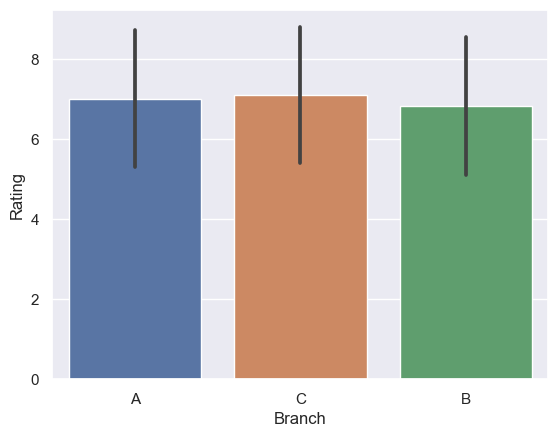

In [ ]:
sns.barplot(x = 'Branch' , y = 'Rating' , data = sales, errorbar="sd")

### Let's do an extensive analysis on the basis of product lines

<AxesSubplot: xlabel='Product line', ylabel='gross income'>

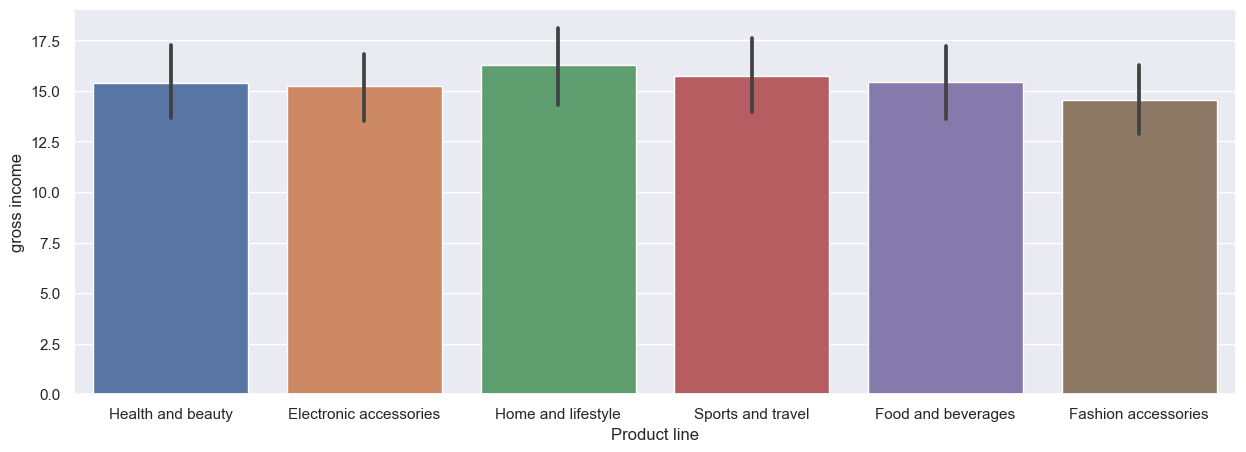

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='Product line', y='gross income', data=sales)

#### Using the groupby function

In [ ]:
pdtline = sales[["Product line", "gross income", "Rating"]].groupby(['Product line'], as_index=False)
pdtline_income = pdtline.sum().sort_values(by = 'gross income' , ascending = False)

             Product line  gross income       Rating
2      Food and beverages     2623.5765  1209.000000
5       Sports and travel     2594.5285  1142.600000
1     Fashion accessories     2585.9950  1253.755623
0  Electronic accessories     2579.0765  1170.077812
4      Home and lifestyle     2554.0090  1077.600000
3       Health and beauty     2342.5590  1061.977812


<AxesSubplot: xlabel='Product line', ylabel='gross income'>

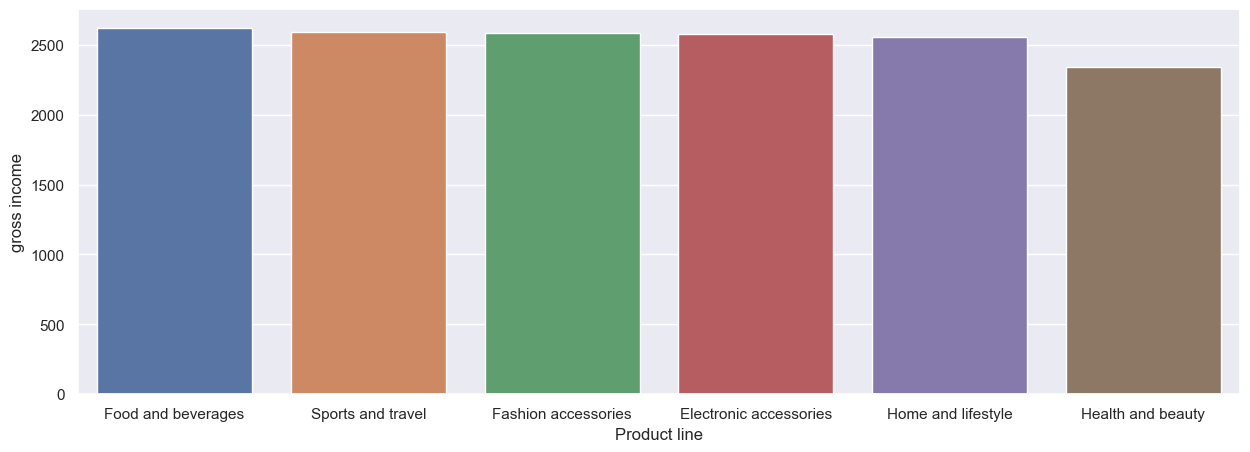

In [ ]:
print(pdtline_income)
plt.figure(figsize=(15,5))
sns.barplot(data = pdtline_income , x = 'Product line' , y = 'gross income')

Performing the same operations for product line and rating

Notice how we are finding the mean here for the rating, summing it up is redundant in this case.

<AxesSubplot: xlabel='Product line', ylabel='Rating'>

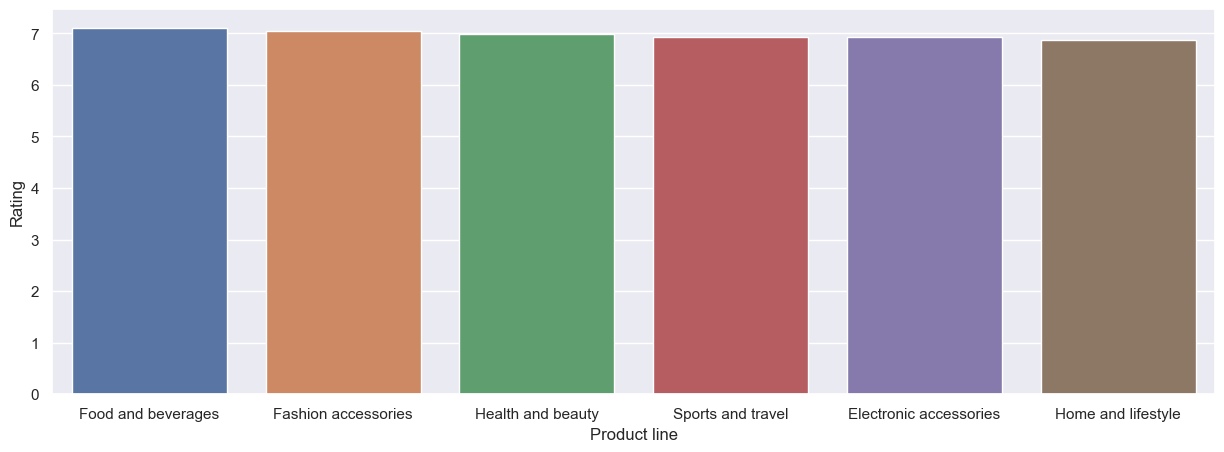

In [ ]:
pdtline_rating = pdtline.mean().sort_values(by = 'Rating' , ascending = False)
plt.figure(figsize = (15,5))
sns.barplot(data = pdtline_rating , x = 'Product line' , y = 'Rating')

## Boxplots

Now the idea is, both plots till now don't represent the distribution of values, rather they just sum the values up and present it

Boxplots add this dimension in their representation


Boxplots compare variables across the levels of another categorical variable. 
Every boxplot has a five number summary,these "five numbers" include,

- Minimum
- First Quartlie
- Second Quartile [Median]
- Third Quartile
- Maximum

The quartiles are contained in the boxes, wheras the whiskers extend to the minimum and the maximum.

Boxplots are used to show distributions of numeric data values, especially when we want to compare them between multiple groups


Text(0.5, 1.0, 'Ratings by Branch')

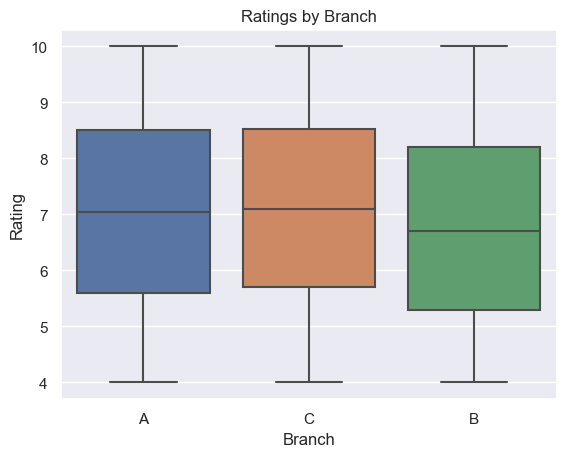

In [ ]:
sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch") 

<AxesSubplot: xlabel='Rating', ylabel='Product line'>

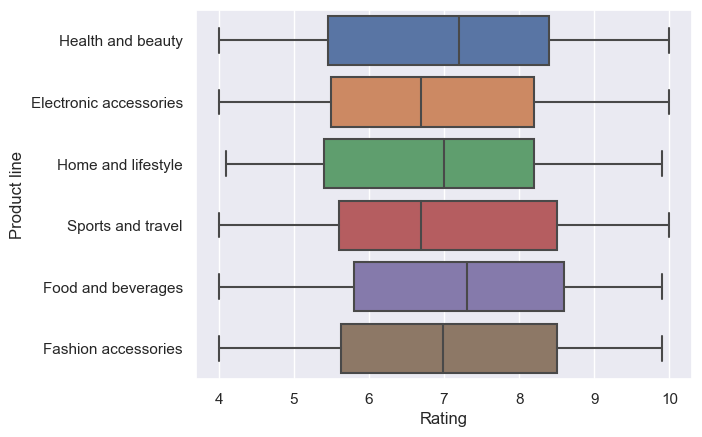

In [ ]:
sns.boxplot( y = 'Product line' , x = 'Rating' , data = sales)

<AxesSubplot: xlabel='Quantity', ylabel='Product line'>

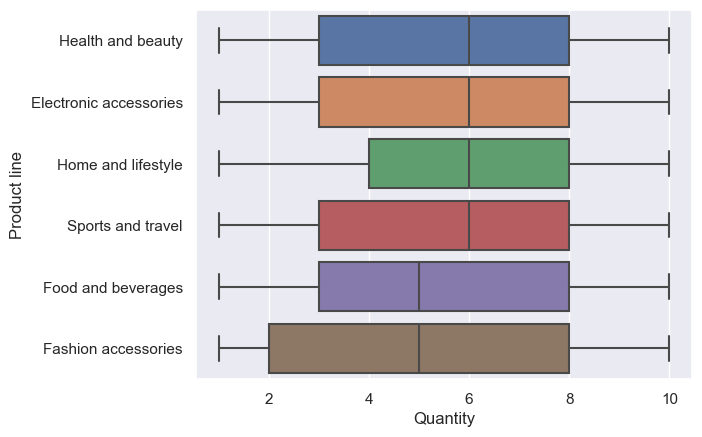

In [ ]:
sns.boxplot( y = 'Product line' , x = 'Quantity' , data = sales)

## Boxenplot

1. Boxenplots are very similar to Boxplots.
2. They just represent more quatrile values
3. Preferred when we have high number of outier values

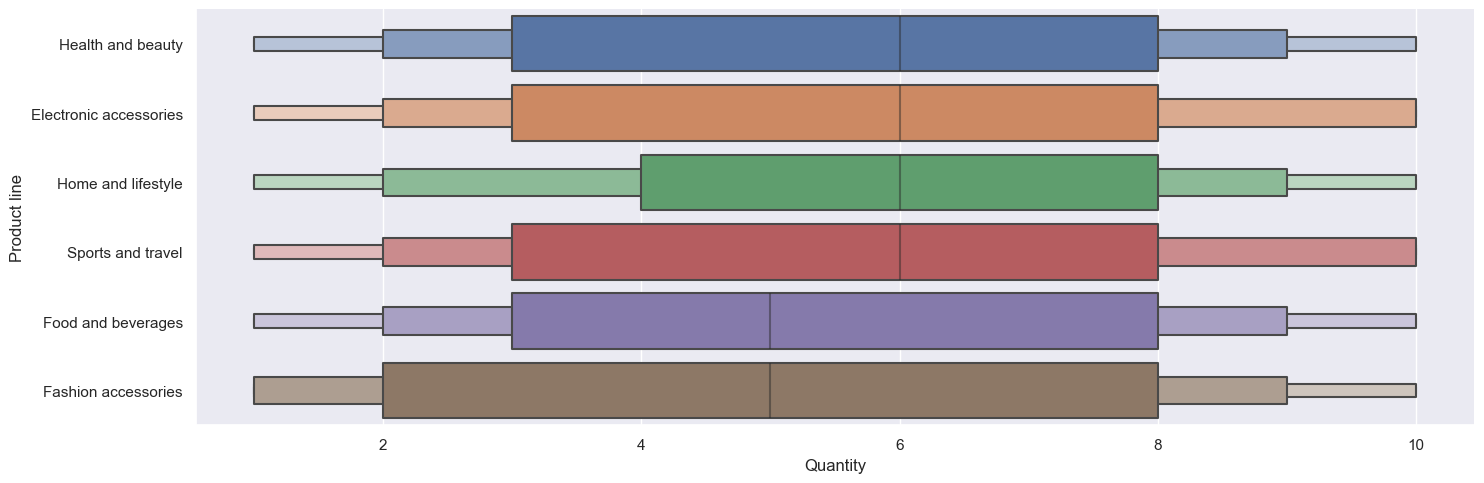

In [ ]:
sns.catplot(y ='Product line', x ='Quantity' ,data = sales,kind='boxen',aspect=3) 

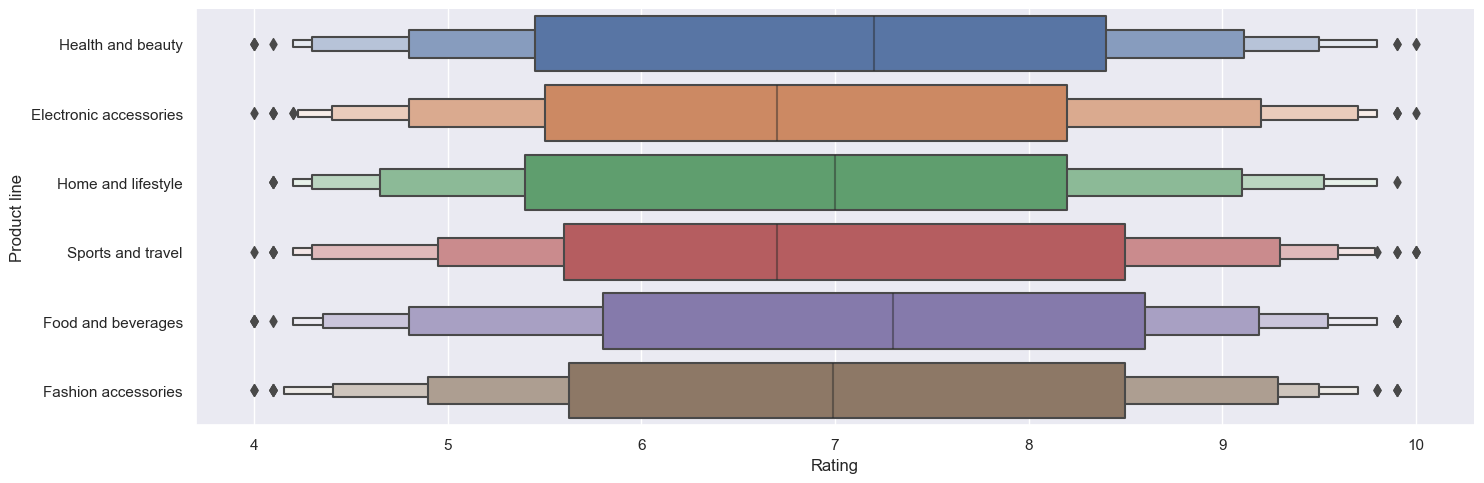

In [ ]:
sns.catplot(y ='Product line', x ='Rating' ,data = sales,kind='boxen',aspect=3) 

## ScatterPlot

<AxesSubplot: xlabel='Time', ylabel='Total'>

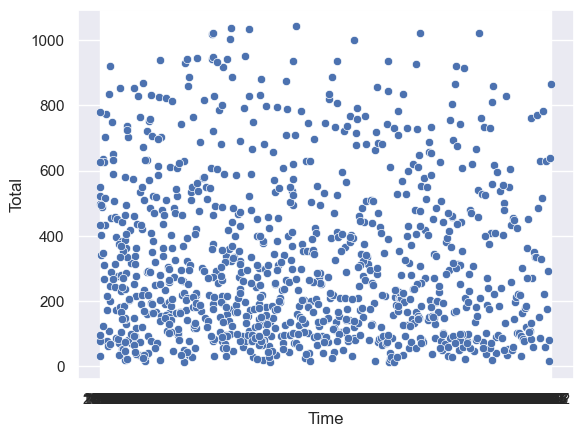

In [ ]:
sns.scatterplot(data=sales, x="Time", y="Total")

## StripPlot

1. We basically add a dimension again
2. Broadly, a scatterplot that can differentiate in categories
3. As individual points are there, it is more useful in the case of small datasets
4. Only issue- Data points may overlap

<AxesSubplot: xlabel='Total', ylabel='Product line'>

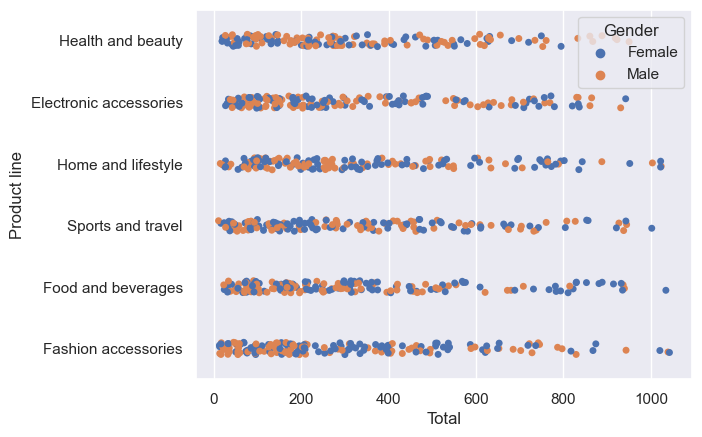

In [ ]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sales) 

<AxesSubplot: xlabel='Rating', ylabel='Product line'>

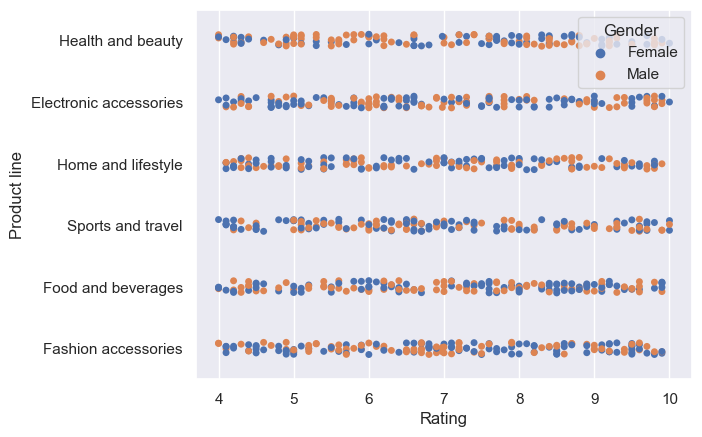

In [ ]:
sns.stripplot(y = 'Product line', x = 'Rating', hue = 'Gender', data=sales) 

#Inference- Electronics and lifestyle have more high ratings by males

## Swarmplot

1. Categorical Scatterplot with non overlapping points- basically solving yhe overlapping problem by adjusting ais
2. Better distribution of values
3. Still, can't scale well

<AxesSubplot: xlabel='Customer type', ylabel='Rating'>

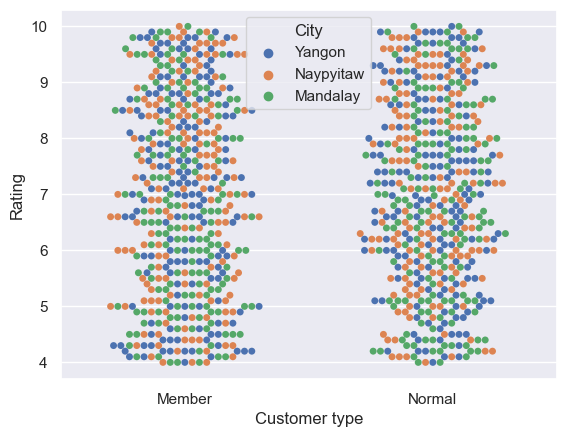

In [ ]:
 sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =sales)

<AxesSubplot: xlabel='Customer type', ylabel='Rating'>

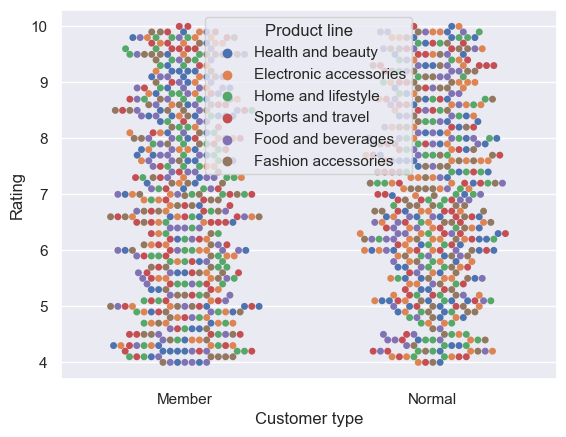

In [ ]:
 sns.swarmplot(x="Customer type",  y = "Rating",  hue = "Product line", data =sales)

## Regplot

1. Uses linear regression to plot the best fit line
2. We use conclusions from the Heatmap to plot these
3. We basically use high correlation value, we try to plot this

<AxesSubplot: xlabel='Unit price', ylabel='gross income'>

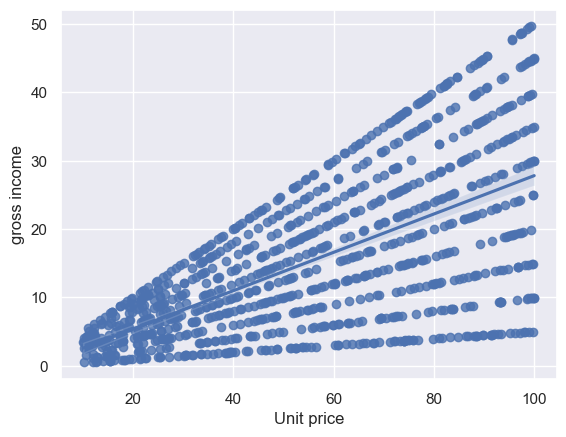

In [ ]:

sns.regplot(x='Unit price',y='gross income',data=sales)

<AxesSubplot: xlabel='Quantity', ylabel='gross income'>

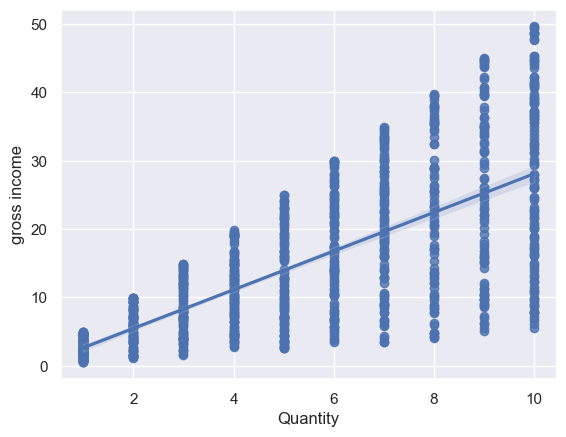

In [ ]:
sns.regplot(x='Quantity',y='gross income',data=sales)

## Lineplots

First let's generate time data in terms of hours

In [ ]:
sales['Time'] = pd.to_datetime(sales['Time'])
sales['Hour'] = (sales['Time']).dt.hour
sales['Hour'].unique() 
sales["Product line"].value_counts()

Fashion accessories       178
Food and beverages        170
Electronic accessories    169
Sports and travel         165
Home and lifestyle        157
Health and beauty         152
Name: Product line, dtype: int64

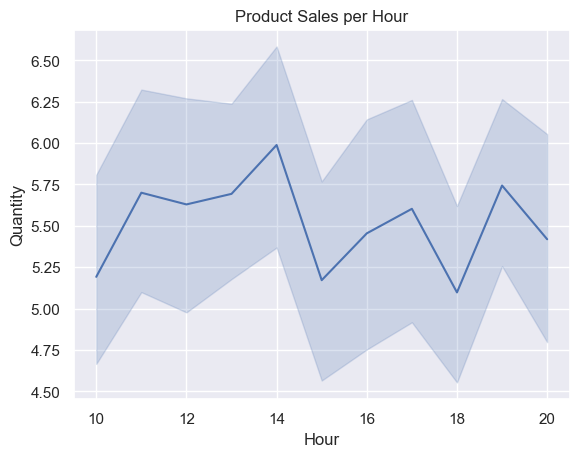

In [ ]:
genderCount  = sns.lineplot(data =sales, x = "Hour", y = "Quantity").set_title("Product Sales per Hour")

## RelPlot

Creating a grid of graph

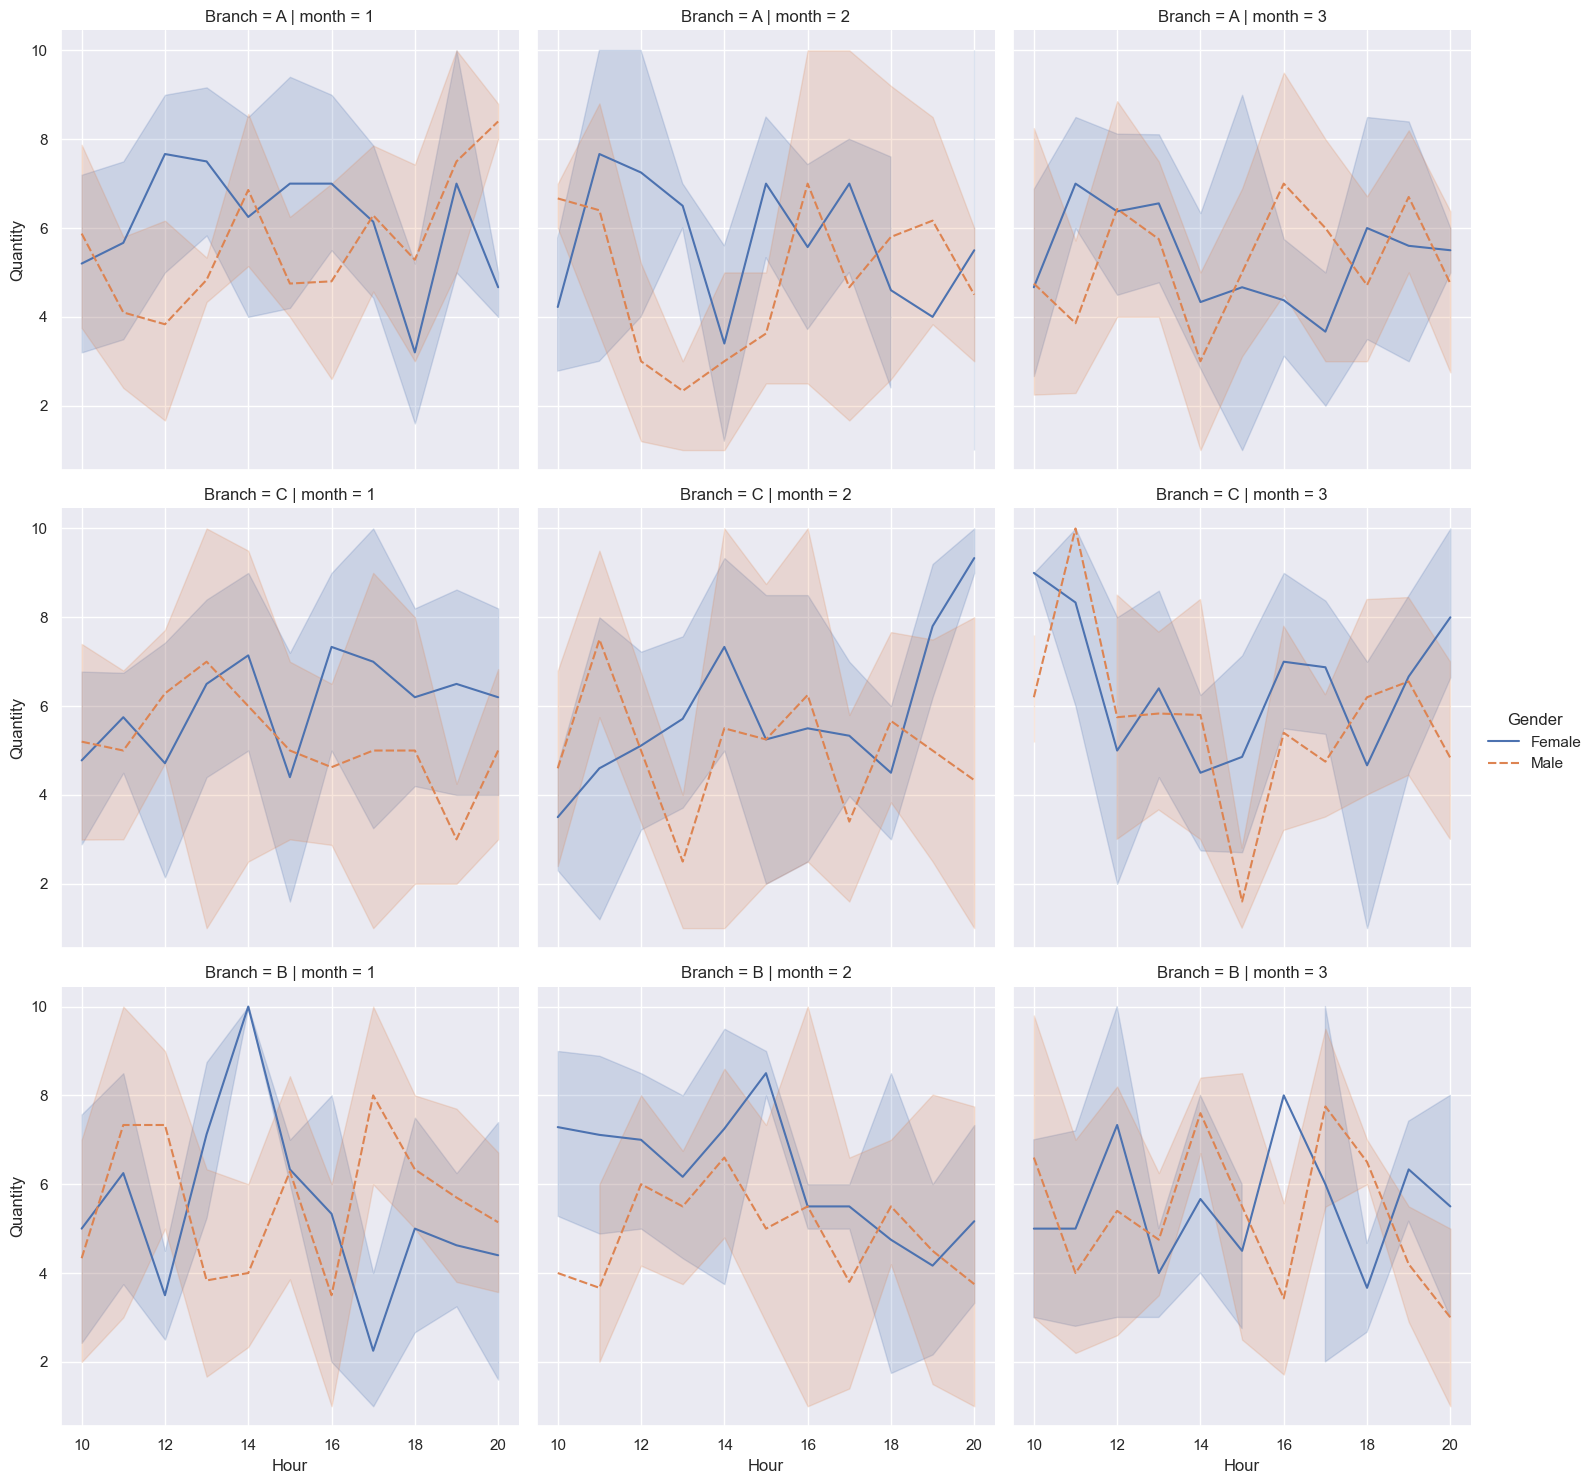

In [ ]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =sales)

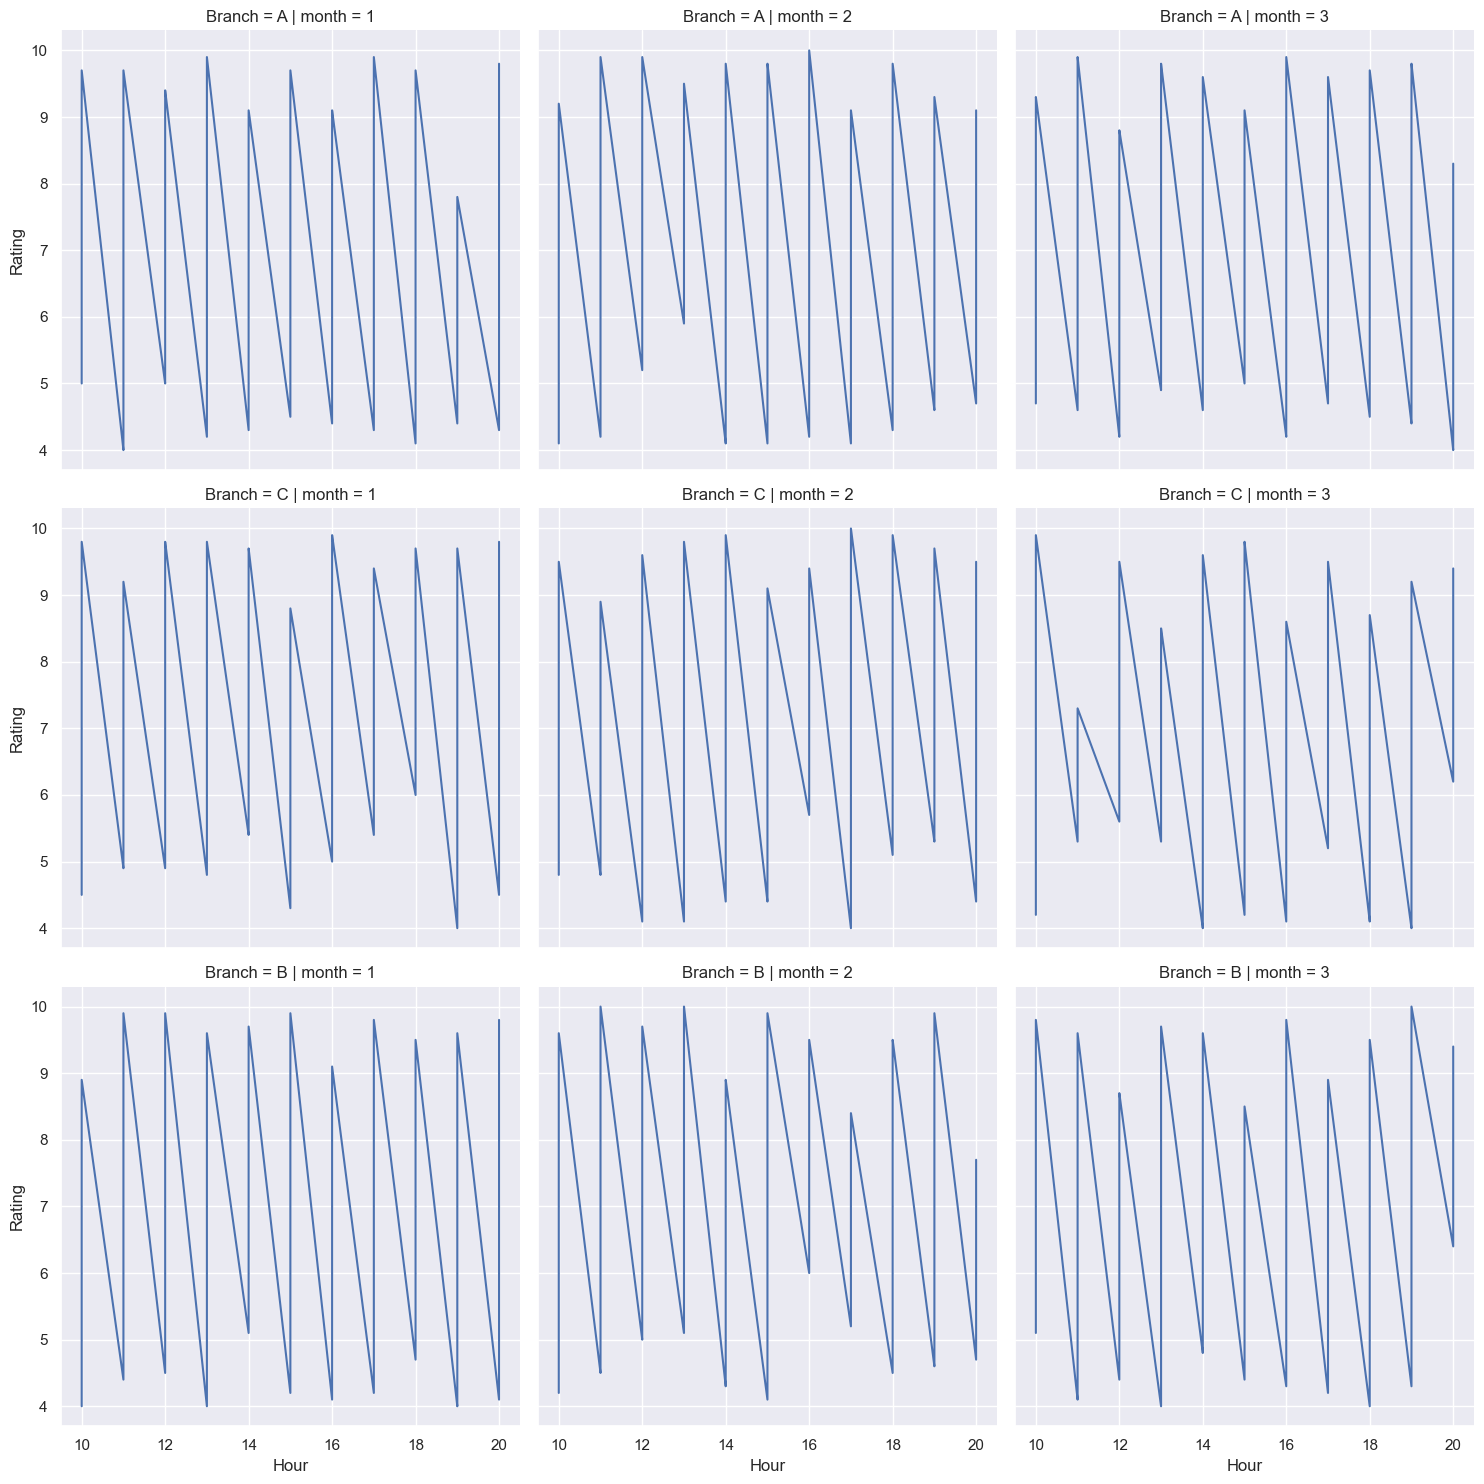

In [ ]:
genderCount  = sns.relplot(x="Hour",  y = 'Rating', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales)

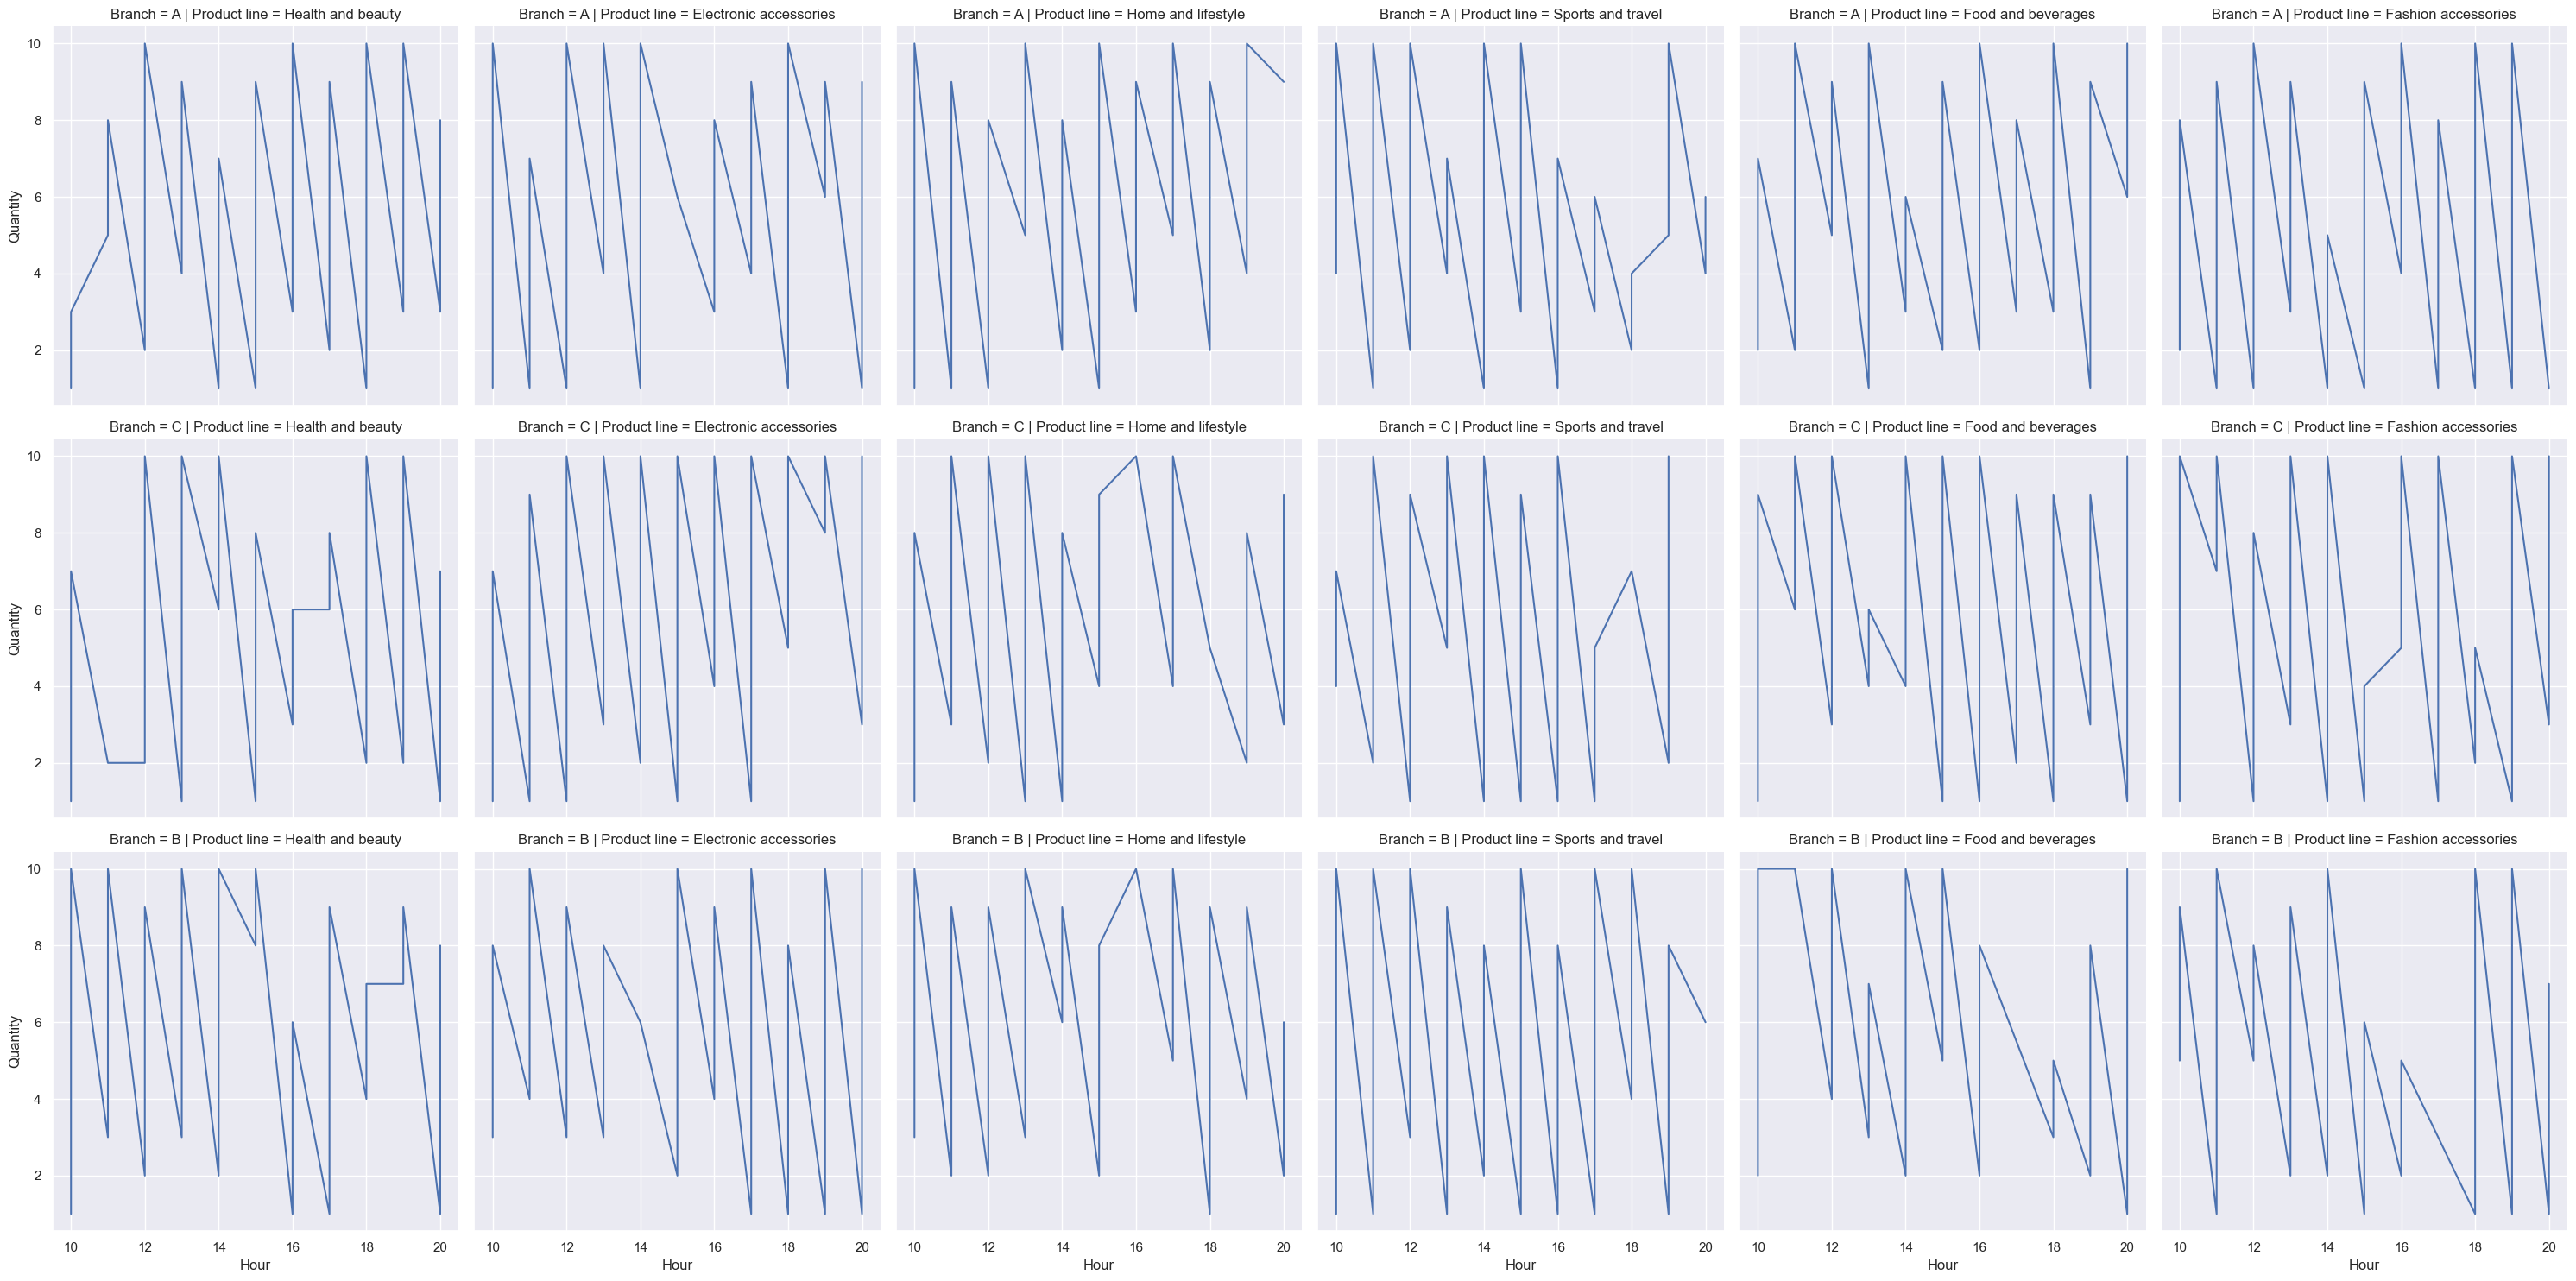

In [ ]:
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =sales)

## WordCloud

(fun excercise)

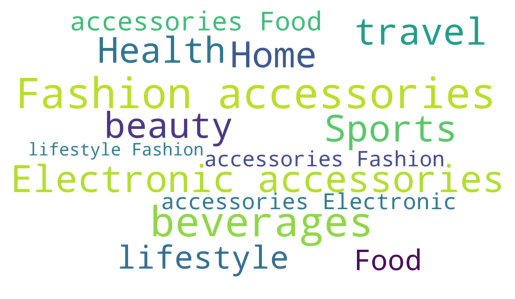

In [ ]:
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(sales['Product line']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()